# Computer Graphics
## Intersections between Circles
In Catersian coordinates, a cricle with center $(x_0,y_0)$ and radius $r$ are the points that satisfy the following equation:
<br>$(x-x_0)^2+(y-y_0)^2=r^2$
<br>Based on the *equation of circle* mentioned above, we can compute the intrersections between circles. The formulas for this computation are stated in the **Pinterest** page mentioned below.
<br>In this NoteBook page, we implement the formulas to display circles with their intersections.
<br>by Hamed Shah-Hosseini, Twitter:@chekaad, Instagram:@ostad.ai
<br>https://github.com/ostad-ai/Computer-Graphics

In [2]:
import pygame as pg
import random
from math import sqrt
from matplotlib import pyplot as plt

In [3]:
WIDTH,HEIGHT=800,600
vec2=pg.math.Vector2
class Point:
    def __init__(self,x=0,y=0,r=5,color=(255,0,0)):
        self.x=x
        self.y=y
        self.r=r
        self.color=color
    def render(self,surface):
        pg.draw.circle(surface,self.color,(self.x+WIDTH/2,self.y+HEIGHT/2),self.r)
        
class Circle:
    def __init__(self,x=0,y=0,r=50,color=(50,50,50)):        
        self.x=x
        self.y=y
        self.r=r
        self.color=color
    def render(self,surface):
        pg.draw.circle(surface,self.color,(self.x+WIDTH/2,self.y+HEIGHT/2),self.r,2)

#--generate circles randomly
def generate_circles(Ncircles=25):
    circles=[]
    for i in range(Ncircles):
        x=random.randrange(-WIDTH//2+5,WIDTH//2-5)
        y=random.randrange(-HEIGHT//2+5,HEIGHT//2-5)
        r=random.randrange(45,90)
        circles.append(Circle(x,y,r))
    return circles        
        
# find the intersection points between two circles c0 and c1
def find_intersection(c0,c1,eps=1):
    points=[]
    dc=(c0.x-c1.x)**2+(c0.y-c1.y)**2
    dc=sqrt(dc)
    if dc>(c0.r+c1.r):
        #circles are separate
        return points
    if dc<abs(c0.r-c1.r):
        #one circle inside another (thus, no solution)
        return points
    if dc<eps and abs(c0.r-c1.r)<eps:
        #there are many solutions (two circles are the same)
        return points
    p=(c0.r**2-c1.r**2+dc**2)/(2*dc)
    h=sqrt(c0.r**2-p**2)
    u=vec2(c1.x-c0.x,c1.y-c0.y)/dc
    n=vec2(-u.y,u.x)
    A=vec2(c0.x,c0.y)+p*u+h*n
    B=vec2(c0.x,c0.y)+p*u-h*n
    points.append(Point(A.x,A.y))
    if A.distance_to(B)>eps:
        points.append(Point(B.x,B.y))
    return points
   
# find intersection points between all circles
def find_points(circles):
    points=[]
    for i in range(len(circles)):
        c0=circles[i]
        for j in range(i+1,len(circles)):
            c1=circles[j]
            result=find_intersection(c0,c1)    
            if result:
                points.extend(result)
    return points

# Finally it returns the result image
def generateImage():
    pg.init()
    screen=pg.display.set_mode((WIDTH,HEIGHT),pg.HIDDEN)
    screen.fill((255,255,255))
    circles=generate_circles()
    points=find_points(circles)
    for circle in circles:
        circle.render(screen)
    for point in points:
        point.render(screen)
    image=pg.surfarray.array3d(screen).swapaxes(0,1)
    pg.quit()
    return image

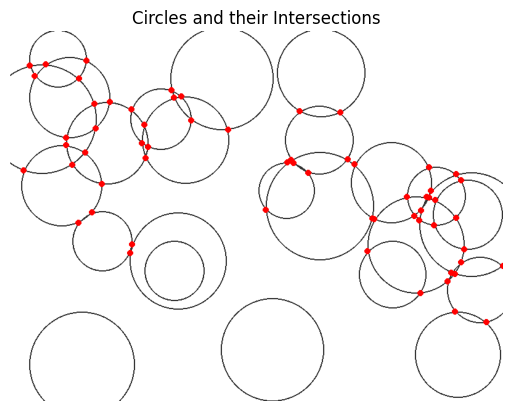

In [4]:
#displaying an example of circles and their intersections
image=generateImage()
plt.imshow(image);plt.axis('off')
plt.title('Circles and their Intersections')
plt.show()